In [67]:
import numpy as np
import astropy.io.fits as pf
import matplotlib.pylab as plt

from jis.photonsim.extract_json import ControlParams, Telescope, Detector
from jis.binutils.scales import get_pixelscales
from jis.binutils.runpixsim import init_pix

In [68]:
cp = ControlParams.from_json("../01_params/ctl4.json")
tel = Telescope.from_json("../01_params/tel10.json")
det = Detector.from_json("../01_params/det10.json")

In [69]:
detpix_scale, fp_cellsize_rad, fp_scale, psfscale = get_pixelscales(cp, tel, det)

In [70]:
acex = pf.open('aceX.fits')[0]
acey = pf.open('aceY.fits')[0]
print(acex.header)

SIMPLE  =                    T / conforms to FITS standard                      BITPIX  =                  -64 / array data type                                NAXIS   =                    1 / number of array dimensions                     NAXIS1  =             24000001                                                  EXTEND  =                    T                                                  ACE-FILE= './01_params/ace_001.json'                                            ACE-TOTT=           3600.00015                                                  END                                                                                                                                                                                                                                                                                                                                                                                                                                                     

In [72]:
dtace = acex.header['ACE-TOTT']/acex.header['NAXIS1']
print()

In [76]:
theta_full, pixdim, Npixcube = init_pix(cp, det, acex.data, acey.data, detpix_scale, None)

In [77]:
texp = 12.5
ndata = int(texp/dtace)+1
print(ndata)

83334


In [78]:
theta_full.shape

(2, 24000001)

In [51]:
t = np.arange(0,ndata*dtace,dtace)

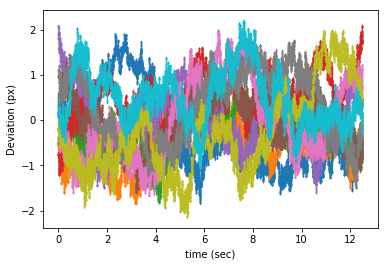

In [79]:
for i in range(0,10):
    plt.scatter(t, theta_full[0,ndata*i:ndata*(i+1)], s=0.1)
plt.xlabel('time (sec)')
plt.ylabel('Deviation (px)')
plt.show()

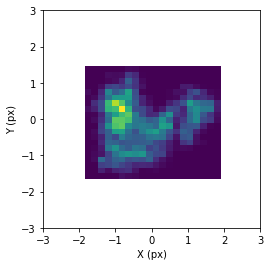

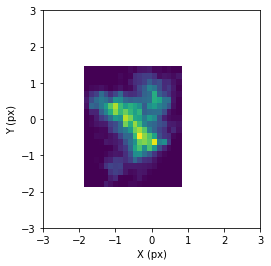

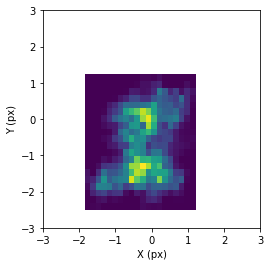

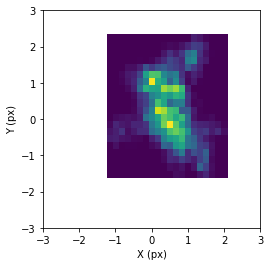

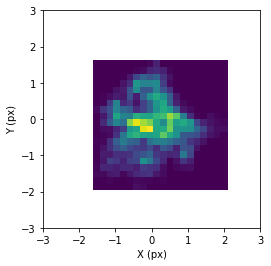

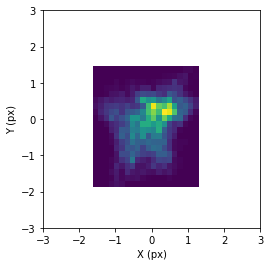

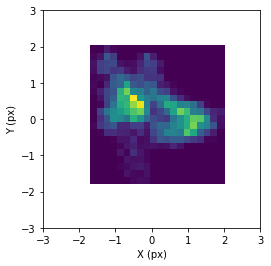

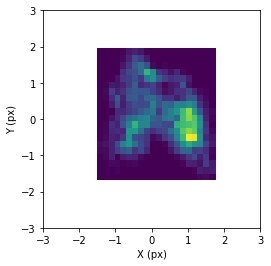

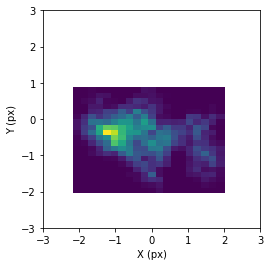

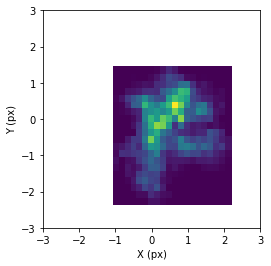

In [86]:
for i in range(0,10):
    plt.hist2d(theta_full[0,ndata*i:ndata*(i+1)], theta_full[1, ndata*i:ndata*(i+1)], bins=20)
    plt.xlim([-3,3])
    plt.ylim([-3,3])
    plt.axes().set_aspect('equal')
    plt.xlabel('X (px)')
    plt.ylabel('Y (px)')
    plt.show()

In [87]:
det.readparams.t_scan

1.3103200000000004

In [89]:
nscan = int(det.readparams.t_scan/dtace)

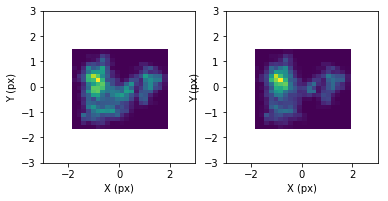

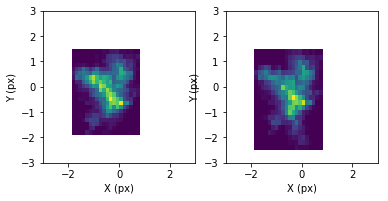

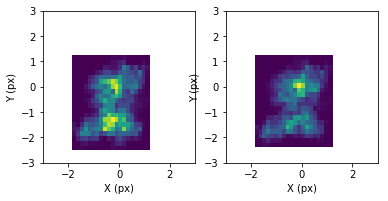

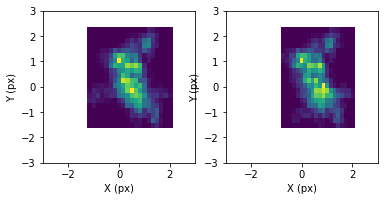

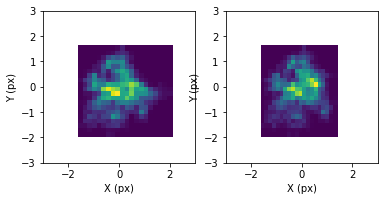

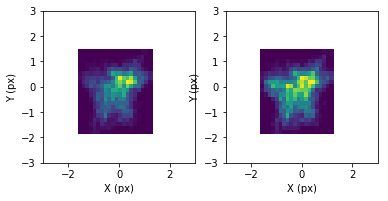

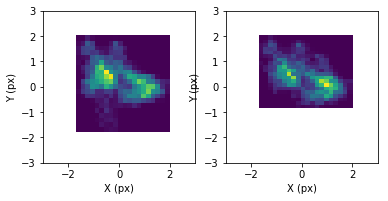

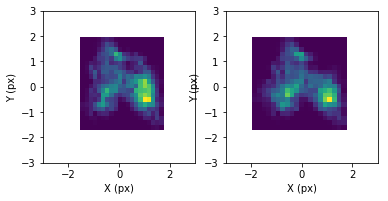

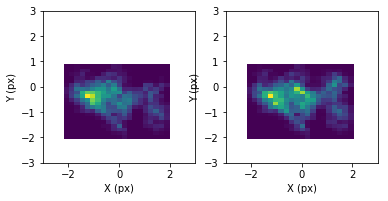

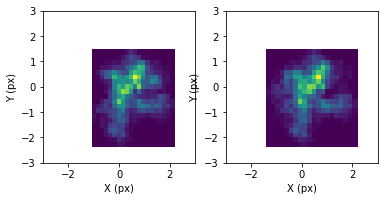

In [91]:
for i in range(0,10):
    fig, axes = plt.subplots(1,2)
    for j in range(2):
        axes[j].hist2d(theta_full[0,ndata*i+nscan*j:ndata*(i+1)+nscan*j], theta_full[1, ndata*i+nscan*j:ndata*(i+1)+nscan*j], bins=20)
        axes[j].set_xlim([-3,3])
        axes[j].set_ylim([-3,3])
        axes[j].set_aspect('equal')
        axes[j].set_xlabel('X (px)')
        axes[j].set_ylabel('Y (px)')
    plt.show()